In [1]:
import pandas as pd

In [2]:
df_movies = pd.read_csv("data/IMDb movies.csv", index_col='imdb_title_id')

In [3]:
df_movies.head(3)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0


In [4]:
df_movies.columns

Index(['title', 'original_title', 'year', 'date_published', 'genre',
       'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81273 entries, tt0000574 to tt9914286
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  81273 non-null  object 
 1   original_title         81273 non-null  object 
 2   year                   81273 non-null  int64  
 3   date_published         81273 non-null  object 
 4   genre                  81273 non-null  object 
 5   duration               81273 non-null  int64  
 6   country                81234 non-null  object 
 7   language               80518 non-null  object 
 8   director               81200 non-null  object 
 9   writer                 79780 non-null  object 
 10  production_company     76948 non-null  object 
 11  actors                 81207 non-null  object 
 12  description            78843 non-null  object 
 13  avg_vote               81273 non-null  float64
 14  votes                  81273 non-null  int64  


In [6]:
df_movies_one = df_movies.copy()

In [7]:
gn = df_movies_one[['genre','reviews_from_users']]
gns = list(set(gn['genre']))
gnm= {}
for i in range (0, len(gns)):
    gnr = gn[gn['genre']==gns[i]]
    gnm[gns[i]]=list(gnr.mean())[0]


    
    



In [8]:
gnm

{'Animation, Crime': 3.0,
 'Romance, War, Western': 15.666666666666666,
 'Biography, Crime, Western': 93.0,
 'Adventure, History, Western': 16.0,
 'Horror, Sci-Fi, Western': 39.0,
 'Action, Crime, Musical': 6.5,
 'Drama, Horror, Fantasy': 4.0,
 'Family, History, War': 10.0,
 'Animation, Comedy, Music': 22.666666666666668,
 'Sci-Fi, Action, Comedy': 4.0,
 'Action, Family, Sci-Fi': 23.333333333333332,
 'Drama, Thriller': 31.92936170212766,
 'Animation, Adventure, Musical': 10.0,
 'Animation, History': 35.5,
 'Comedy, History': 16.225806451612904,
 'Animation, Fantasy, History': 3.0,
 'Drama, Crime, Mystery': 9.5,
 'Action, Fantasy, History': 44.0,
 'Family, Adventure, Fantasy': 8.5,
 'Comedy, Drama, Sport': 28.728395061728396,
 'Adventure, Drama, Western': 88.5,
 'Drama, Musical, Western': 14.0,
 'Biography, History, Romance': 16.5,
 'Crime, Horror': 17.023809523809526,
 'Family, Adventure, Sci-Fi': 32.5,
 'Comedy, Western, Adventure': 3.0,
 'Action, Adventure, War': 39.78260869565217,
 

### 1. Find the mean from  review_from_users for each unique genre 
e.g action,drama=7.2 thriller=9.7
### 2. We replace each null value with its corresponding mean

In [9]:
df_movies_one.drop_duplicates(inplace=True, keep='first')

In [10]:
df_nulls = df_movies_one.isnull()

In [11]:
df_nulls.sum()

title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     39
language                   755
director                    73
writer                    1493
production_company        4325
actors                      66
description               2430
avg_vote                     0
votes                        0
budget                   58469
usa_gross_income         66179
worlwide_gross_income    51381
metascore                68551
reviews_from_users        7077
reviews_from_critics     10987
dtype: int64

In [12]:
df_movies_one.shape

(81273, 21)

In [13]:
m=list (df_movies_one['country'].mode())

In [14]:
mm = m[0]

In [15]:
n = list(df_movies_one['language'].mode())

In [16]:
nn = n[0]

In [17]:
p = list(df_movies_one['director'].mode())

In [18]:
pp = p[0]

In [19]:
q = list(df_movies_one['writer'].mode())

In [20]:
qq = q[0]

In [21]:
r = list(df_movies_one['production_company'].mode())

In [22]:
rr = r[0]

In [23]:
s = list(df_movies_one['description'].mode())

In [24]:
ss = s[0]

In [25]:
t = list(df_movies_one['actors'].mode())

In [26]:
tt = s[0]

In [27]:
df_movies_one['metascore'].mean()

55.76269454488288

In [28]:
df_movies_one['reviews_from_users'].mean()

43.75319424227721

In [29]:
df_movies_one['reviews_from_critics'].mean()

27.992758159519678

In [30]:
df_movies_one['country'].fillna(mm,inplace=True)

In [31]:
df_movies_one['language'].fillna(nn,inplace=True)

In [32]:
df_movies_one['director'].fillna(pp,inplace=True)

In [33]:
df_movies_one['writer'].fillna(qq,inplace=True)

In [34]:
df_movies_one['production_company'].fillna(rr,inplace=True)

In [35]:
df_movies_one['actors'].fillna(tt,inplace=True)

In [36]:
df_movies_one['description'].fillna(ss,inplace=True)

In [37]:
df_movies_one['budget'].fillna(0,inplace=True)

In [38]:
df_movies_one['usa_gross_income'].fillna(0,inplace=True)

In [39]:
df_movies_one['worlwide_gross_income'].fillna(0,inplace=True)

In [40]:
df_movies_one['metascore'].fillna(df_movies_one['metascore'].mean(),inplace=True)

In [41]:
df_movies_one['reviews_from_users'].fillna(df_movies_one['reviews_from_users'].mean(),inplace=True)

In [42]:
df_movies_one['reviews_from_critics'].fillna(df_movies_one['reviews_from_critics'].mean(),inplace=True)

In [43]:
df_nulls2 = df_movies_one.isnull()

In [44]:
df_nulls2.sum()

title                    0
original_title           0
year                     0
date_published           0
genre                    0
duration                 0
country                  0
language                 0
director                 0
writer                   0
production_company       0
actors                   0
description              0
avg_vote                 0
votes                    0
budget                   0
usa_gross_income         0
worlwide_gross_income    0
metascore                0
reviews_from_users       0
reviews_from_critics     0
dtype: int64

In [45]:
xt = df_movies_one['genre'].value_counts()
xt

Drama                      11809
Comedy                      7322
Comedy, Drama               3822
Drama, Romance              3252
Comedy, Romance             2383
                           ...  
Crime, Western, Drama          1
Mystery, Sci-Fi, Drama         1
Horror, Crime, Thriller        1
Drama, Sci-Fi, Sport           1
Animation, Crime               1
Name: genre, Length: 1264, dtype: int64

In [46]:
gp = list(set(df_movies_one['genre'].value_counts()))
gp







[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 527,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 537,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 11809,
 546,
 547,
 36,
 37,
 38,
 551,
 40,
 41,
 42,
 43,
 44,
 39,
 46,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 570,
 59,
 60,
 61,
 62,
 63,
 64,
 58,
 66,
 70,
 71,
 72,
 73,
 75,
 76,
 77,
 78,
 15,
 80,
 81,
 596,
 85,
 86,
 87,
 88,
 84,
 90,
 91,
 92,
 93,
 606,
 95,
 94,
 97,
 98,
 100,
 101,
 103,
 104,
 108,
 114,
 115,
 116,
 117,
 118,
 120,
 123,
 2172,
 125,
 124,
 25,
 128,
 129,
 1156,
 133,
 134,
 132,
 136,
 138,
 139,
 2189,
 142,
 145,
 147,
 148,
 150,
 7322,
 155,
 156,
 157,
 158,
 167,
 168,
 169,
 33,
 171,
 34,
 1197,
 35,
 178,
 3252,
 180,
 695,
 183,
 189,
 190,
 192,
 193,
 198,
 199,
 202,
 203,
 204,
 207,
 211,
 725,
 216,
 1241,
 217,
 220,
 228,
 230,
 3822,
 239,
 238,
 1270,
 246,
 248,
 249,
 253,
 1277,
 264,
 272,
 275,
 279,
 284,
 287,
 301,
 310,
 823,
 328,
 329,
 330,
 334,
 2383,
 

In [47]:
type(gp)

list

In [48]:
import matplotlib.pyplot as plt







gen = []
for g in df_movies_one['genre']:
    gg = g.split('|')
    gen = gen + gg
    gen = list(set(gen))

print(gen)




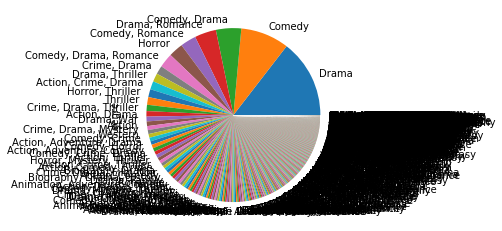

In [53]:
df_movies_one['genre'].value_counts().plot(kind='pie')

In [52]:
df_movies_one.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81273 entries, tt0000574 to tt9914286
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  81273 non-null  object 
 1   original_title         81273 non-null  object 
 2   year                   81273 non-null  int64  
 3   date_published         81273 non-null  object 
 4   genre                  81273 non-null  object 
 5   duration               81273 non-null  int64  
 6   country                81273 non-null  object 
 7   language               81273 non-null  object 
 8   director               81273 non-null  object 
 9   writer                 81273 non-null  object 
 10  production_company     81273 non-null  object 
 11  actors                 81273 non-null  object 
 12  description            81273 non-null  object 
 13  avg_vote               81273 non-null  float64
 14  votes                  81273 non-null  int64  
